# Classifying an image as Happy or Sad using CNN

## Importing the nescessary libraries

In [118]:
import tensorflow as tf
import os
import cv2
import imghdr
from matplotlib import pyplot as plt

## Removing problematic images 

In [70]:
#Specifying the path where my data is placed.
Data_HS = '/Users/dc18/Data_HS'

In [121]:
#Specifying the image extentions supported by tensorflow dataset 
#Supported image formats: .jpeg, .jpg, .png, .bmp, .gif. Animated gifs are truncated to the first frame.
image_exts= ['jpeg','jpg','bmp','png']

*The loop belows goes through every image in the dataset and gives you the name of the images. Using this loop you can check the images in your dataset*

In [72]:
for item in os.listdir(Data_HS):
    full_path = os.path.join(Data_HS, item)
    if os.path.isdir(full_path):  # Check if it's a directory
        for image in os.listdir(full_path):
            print(image)
    else:
        print(f"{item} is not a directory")


images26.jpg
images32.jpg
e162ccda8ce0f197f8863f327add9233.jpg
05-12-21-happy-people.jpg
image22.jpeg
happy.jpg
Overtly-Cheerful-Primer-Editorials-min.png
GettyImages-871518740-1024x707.jpg
7-principles-of-successful-and-happy-people.png
how-happy-are-healthy-people.jpg
physed-happiness-facebookJumbo.jpg
170404-happy-workers-feature.jpg
images33.jpg
images27.jpg
image18.jpeg
MV5BMTM3ODM0NTQ1MF5BMl5BanBnXkFtZTcwMzAxMTM5OA._V1_.jpg
friends-happy-190821.jpg
images31.jpg
images25.jpg
Happy-people-raise-happy-kids-raise-yourself-first.jpg
images19.jpg
habits-that-define-very-happy-people.jpg
goup-happy-people-group-jumping-isolated-white-background-35582232.jpg
1902587.jpg
o-HAPPY-facebook.jpg
07-120104-happy_people_are_not_nice_people.jpg
happy-people-13772392.jpg
images18.jpg
images24.jpg
images30.jpg
image14.jpeg
image15.jpeg
young-and-happy-people-vector-15114154.jpg
images34.jpg
maxresdefault2.jpg
images20.jpg
bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg
happy-people

### The code snippet below
* Iterates Over Subdirectories: It loops through each item in the directory specified by Data_HS.
* Checks for Directories: For each item, it checks if the item is a directory.
* Processes Images in Each Directory: If the item is a directory (representing an image class), it then iterates through each file in that directory.
* Reads Each Image: It attempts to read each file as an image using OpenCV's cv2.imread.
* Checks Image File Type: Determines the file type of the image using imghdr.what and compares it against a list of acceptable image extensions (image_exts).
* Removes Unwanted Files: If the file type is not in the list of acceptable extensions, it prints a message indicating the file is not an image and removes the file from the directory.
* Error Handling: Catches and prints any exceptions that occur during the image processing, particularly issues related to reading the files.
* Handles Non-Directory Items: If an item in Data_HS is not a directory, it prints a message indicating so.

In [120]:

for image_class in os.listdir(Data_HS):
    class_path = os.path.join(Data_HS, image_class)
    if os.path.isdir(class_path):  # Check if it's a directory
        for image in os.listdir(class_path):
            image_path = os.path.join(class_path, image)
            try:
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)
                if tip not in image_exts:
                    print('Image not in list {}'.format(image_path))
                    os.remove(image_path)
            except Exception as e:
                print('Issue with image {}: {}'.format(image_path, e))
    else:
        print(f"{class_path} is not a directory")

        #Somethimes while downloading assets from various sources unwanted files creep in. This filters through all of those.    

/Users/dc18/Data_HS/.DS_Store is not a directory


## Preparing Data for the model

In [74]:
tf.data.Dataset
#This is one of the best ways to handle input data and perform a lot of operation before feeding it to the model for training.

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [75]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



The next line of code is used to load images from a directory into a format suitable for training a machine learning model, specifically using TensorFlow and Keras. Here's what it does in simple terms:

* Loads Images from a Directory: The function image_dataset_from_directory looks into the folder named Data_HS on your computer or server. This folder should contain images that you want to use for training a machine learning model.

* Organizes Images Based on Folders: The images in Data_HS should be organized into subfolders, with each subfolder representing a different category or class of images. For example, if you have images of cats and dogs, there should be a 'cats' folder and a 'dogs' folder.

* Resizes Images: All the images are automatically resized to 320x320 pixels. This is important because the machine learning model expects all input images to be of the same size.

* Creates a Dataset: The function converts these images into a dataset. A dataset in machine learning is like a collection of data that the model can learn from. In this case, the dataset will consist of the images and their corresponding labels (categories).

* Prepares for Training: The created dataset is now ready to be used to train a machine learning model. The model will learn to recognize and categorize images based on the examples from this dataset.

For further reading
__(https://www.tensorflow.org/api_docs/python/tf/data/Dataset)__

In [76]:
data =tf.keras.utils.image_dataset_from_directory(Data_HS,image_size=(320, 320) )

Found 352 files belonging to 2 classes.


In [77]:
data_iterator= data.as_numpy_iterator()
#Iterator over a dataset with elements converted to numpy

In [78]:
batch= data_iterator.next()
len(batch)

2

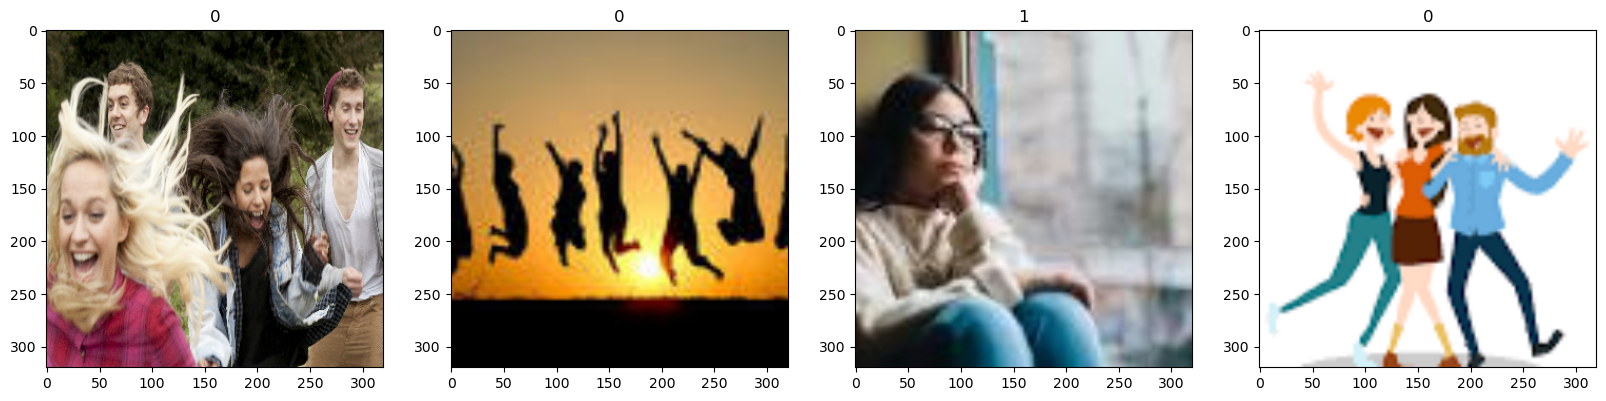

In [79]:
fig, ax = plt.subplots(ncols=4 , figsize=(20,20))
for idx, img in enumerate (batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].set_title(batch[1][idx])
#Calling a batch and taking a look at it

The augment function applies a series of random transformations to images, including horizontal and vertical flips, brightness adjustments, contrast variations, and changes in saturation and hue. These alterations enhance the robustness of a machine learning model by simulating a variety of real-world conditions, such as different orientations, lighting, and color settings. This approach diversifies the training dataset, which is crucial for improving the model's ability to generalize to new, unseen data and reducing the likelihood of overfitting.

Further reading
__(https://www.tensorflow.org/tutorials/images/data_augmentation)__




In [80]:
def augment(image, label):
    # Random transformations
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.5)
    image = tf.image.random_contrast(image, lower=0.5, upper=1.5)
    image = tf.image.random_saturation(image, lower=0.5, upper=1.5)
    image = tf.image.random_hue(image, max_delta=0.2)
    return image, label


In [81]:
#scaling down the data

data = data.map(lambda x, y: (x / 255, y))
scaled_iterator= data.as_numpy_iterator().next()

## Splitting the data

In [82]:
#Creating the training, Validation and Test Sets
train_size = int(len(data)*.7)+1
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [83]:
# Apply data augmentation only on the training set
train = train.map(augment)

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.regularizers import l2
from keras.regularizers import l2


## Building the deep Model

In [98]:
model = Sequential()

model.add(Conv2D(16, (3, 3),1, activation='relu', input_shape=(320, 320, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(320, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [99]:
model.compile('adam',loss= tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [100]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 318, 318, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 159, 159, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 157, 157, 32)      4640      
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 78, 78, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 76, 76, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 38, 38, 64)       

## Training the model

In [109]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
8/8 [==============================] - 7s 723ms/step - loss: 0.5603 - accuracy: 0.7188 - val_loss: 0.4274 - val_accuracy: 0.7656
Epoch 2/20
8/8 [==============================] - 8s 774ms/step - loss: 0.5645 - accuracy: 0.7148 - val_loss: 0.3772 - val_accuracy: 0.8594
Epoch 3/20
8/8 [==============================] - 7s 726ms/step - loss: 0.5172 - accuracy: 0.7422 - val_loss: 0.5513 - val_accuracy: 0.7500
Epoch 4/20
8/8 [==============================] - 7s 720ms/step - loss: 0.4918 - accuracy: 0.7578 - val_loss: 0.4910 - val_accuracy: 0.7812
Epoch 5/20
8/8 [==============================] - 7s 700ms/step - loss: 0.4342 - accuracy: 0.8281 - val_loss: 0.4155 - val_accuracy: 0.8125
Epoch 6/20
8/8 [==============================] - 7s 785ms/step - loss: 0.4279 - accuracy: 0.8242 - val_loss: 0.4068 - val_accuracy: 0.8125
Epoch 7/20
8/8 [==============================] - 7s 718ms/step - loss: 0.4261 - accuracy: 0.8047 - val_loss: 0.4274 - val_accuracy: 0.8125
Epoch 8/20
8/8 [====

## Performance Plots

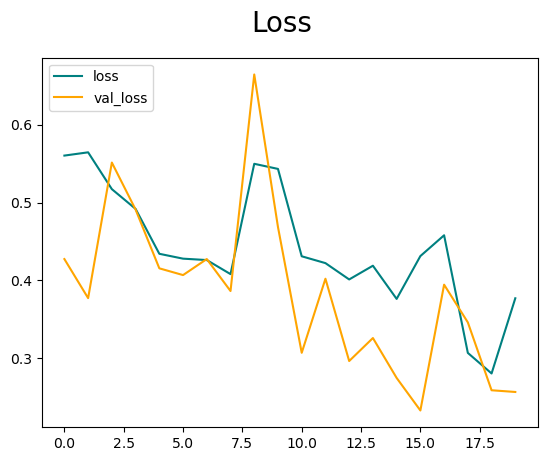

In [110]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

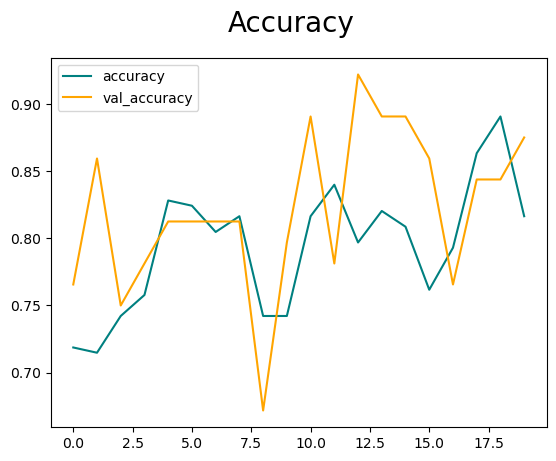

In [111]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluation of the Model on Test Batch

In [112]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)


print(f"Precision: {pre.result():.4f}, Recall: {re.result():.4f}, Accuracy: {acc.result():.4f}")


1/1 [==============================] - 0s 132ms/step
Precision: 0.9545, Recall: 0.9545, Accuracy: 0.9375


Finding out the scores of the model with the testing Batch. It gives a good accuracy of 93 percent.

## Evaluation of the model on a Radom Image

In [105]:
import cv2

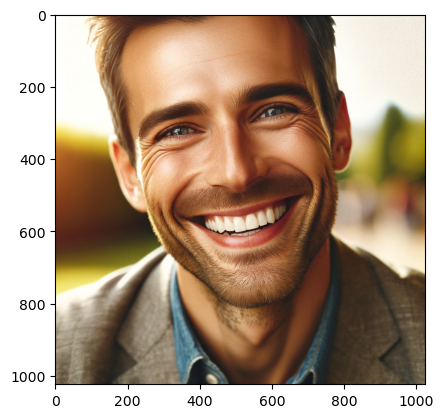

In [113]:
image_path = '/Users/dc18/Downloads/DALL·E 2023-12-23 02.16.06 - A portrait of a happy man, expressing joy and contentment. His eyes are twinkling with happiness, and his smile is wide and genuine. He has short, nea.png'
img = cv2.imread(image_path)
if img is not None:
    # Convert from BGR to RGB (OpenCV uses BGR by default)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Display the image
    plt.imshow(img_rgb)
    plt.show()
else:
    print(f"Failed to load the image from {image_path}")

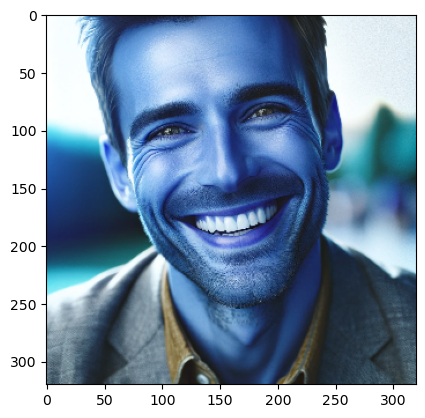

In [107]:
resize = tf.image.resize(img, (320,320))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [114]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 33ms/step


array([[0.3176855]], dtype=float32)

In [115]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# THE END 